# Feature Scaling

In [11]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Upload dataset from local
# 1. เมนู File:
  # เลือก "Open" เพื่อเปิดไฟล์จาก local system
  # เลือก "Import" เพื่อนำเข้าข้อมูลจากแหล่งต่างๆ (CSV, text files)

# 2. File Browser:
  # ค้นหาไฟล์ใน File Browser ทางด้านซ้าย
  # ดับเบิ้ลคลิกเพื่อเปิดไฟล์ใน notebook ใหม่

# 3. Python code:
  # ใช้ Python code กับ `open()` เพื่อเปิดไฟล์
  # ตัวอย่าง:

# from google.colab import files
# uploades = files.upload()

In [13]:
data=pd.read_csv('data/Data_for_Missing_Values.csv')
data.head(15)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


As we can see that we have some missing values, we will drop them.

In [14]:
data=data.dropna()
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [15]:
#calculationg mean,median before feature scaling
data.mean()

TypeError: Could not convert ['FranceSpainGermanySpainFranceFranceGermanyFrance' 'NoYesNoNoYesYesNoYes'] to numeric

In [4]:
data.median()

NameError: name 'data' is not defined

We can clearly observe features Age and Salary have values of varying magnitude. This is where feature scaling can help us resolve this issue.

In [7]:
#slicing the feature age and salary
df=data.iloc[:,1:3].values
df

array([[4.4e+01, 7.2e+04],
       [2.7e+01, 4.8e+04],
       [3.0e+01, 5.4e+04],
       [3.8e+01, 6.1e+04],
       [3.5e+01, 5.8e+04],
       [4.8e+01, 7.9e+04],
       [5.0e+01, 8.3e+04],
       [3.7e+01, 6.7e+04]])

In [8]:
#MinMaxScaler or Normalization
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
df_after_minmax=min_max_scaler.fit_transform(df)
df_after_minmax

array([[0.73913043, 0.68571429],
       [0.        , 0.        ],
       [0.13043478, 0.17142857],
       [0.47826087, 0.37142857],
       [0.34782609, 0.28571429],
       [0.91304348, 0.88571429],
       [1.        , 1.        ],
       [0.43478261, 0.54285714]])

In [9]:
#Standarization
ss=preprocessing.StandardScaler()
df_after_ss=ss.fit_transform(df)
df_after_ss

array([[ 0.69985807,  0.58989097],
       [-1.51364653, -1.50749915],
       [-1.12302807, -0.98315162],
       [-0.08137885, -0.37141284],
       [-0.47199731, -0.6335866 ],
       [ 1.22068269,  1.20162976],
       [ 1.48109499,  1.55119478],
       [-0.211585  ,  0.1529347 ]])

In [18]:
data_minmax=pd.DataFrame(df_after_minmax, columns=['age','salary'])
data_minmax

,age,salary
0,0.739130,0.685714
1,0.000000,0.000000
2,0.130435,0.171429
3,0.478261,0.371429
4,0.347826,0.285714
5,0.913043,0.885714
6,1.000000,1.000000
7,0.434783,0.542857


In [19]:
#calculating mean,median after feature scaling
data_minmax.mean()

age       0.505435
salary    0.492857
dtype: float64

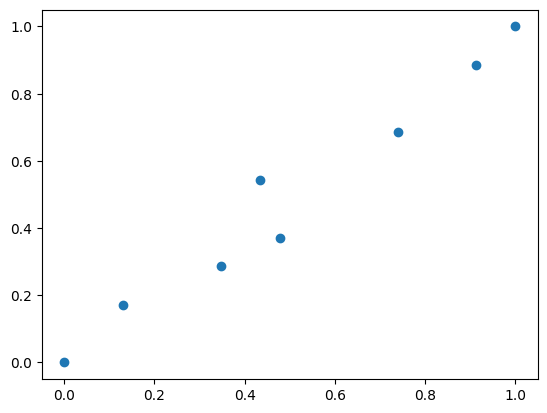

In [21]:
plt.scatter(data_minmax['age'], data_minmax['salary'])
plt.show()

In [11]:
df_after_ss.mean()

5.551115123125783e-17